<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/07_ensemble_learning_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensamble Learning: Gradient Boosting

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Apply Gradient Boosting
 for ensamble learning

## Load Dataset

In [2]:
from sklearn.datasets import make_moons, load_iris, load_breast_cancer, load_wine, fetch_openml

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from graphviz import Source
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from IPython.display import Image
import time
import math


## Generate Dataset

In [3]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100) # y = 3x^2 + Gaussian Noise

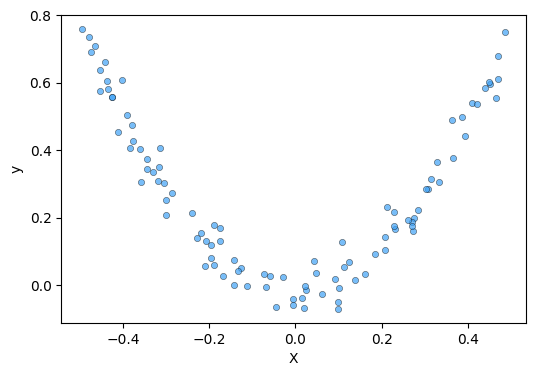

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=y, marker='o', color='#3FA2F6', s=20, edgecolor='k', alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [33]:
def train_gradient_boosting(X, y, n_estimators, max_depth, learning_rate):
    trees = []
    X_train = X
    y_train = [y]

    for i in range(n_estimators):
        trees.append(DecisionTreeRegressor(max_depth=max_depth, random_state=42))
        trees[i].fit(X, y_train[i])
        y_train.append(y_train[i] - learning_rate * trees[i].predict(X))

    return trees, y_train


def predict_gradient_boosting(X, trees):
    y_pred = np.zeros(X.shape[0])
    for i in range(len(trees)):
        y_pred += trees[i].predict(X)

    return y_pred

In [34]:
n_estimators = 3
max_depth = 2
learning_rate = 1.0

In [35]:
trees, y_train = train_gradient_boosting(X, y, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
X_new = np.array([[-0.4], [0.], [0.5]])
y_pred = predict_gradient_boosting(X_new, trees)
print(y_pred)

[0.49484029 0.04021166 0.75026781]


In [47]:
print(y[:3])
for i in range(n_estimators):
  print(y_train[i][:3])
print(y_train[3][:3])

[0.0515729  0.59447979 0.16605161]
[0.0515729  0.59447979 0.16605161]
[-0.07199323  0.06591133  0.04248548]
[0.01840471 0.02599835 0.00257251]
[ 0.01136124  0.09452781 -0.00447096]


In [36]:
gbrt = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
gbrt.fit(X, y)
print(gbrt.predict(X_new))

[0.49484029 0.04021166 0.75026781]


In [74]:
trees[:3]

[DecisionTreeRegressor(max_depth=2, random_state=42),
 DecisionTreeRegressor(max_depth=2, random_state=42),
 DecisionTreeRegressor(max_depth=2, random_state=42)]

In [141]:
def plot_predictions(regressors, X, y, style, ax,
                     label=None, data_style="b.", data_label=None):

    x1 = np.linspace(X.min(), X.max(), 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    ax.plot(x1, y_pred, style, linewidth=2, label=label)
    ax.set_xlabel("X")
    ax.set_ylabel("y", rotation=0)

    if label or data_label:
        ax.legend(loc="upper center")

def generate_label(n):
    label = 'h(x) ='
    for i in range(n):
        label += f' h_{i//2+1} +'
    return label[:-2]

def generate_data_label(n):
    if n==0 or n==1:
        return 'Training set'
    elif n%2==1:
        return None
    else:
        label = 'Residuals: y -'
        for i in range(n//2):
            label += f' h{i+1}(x) -'
        return label[:-2]

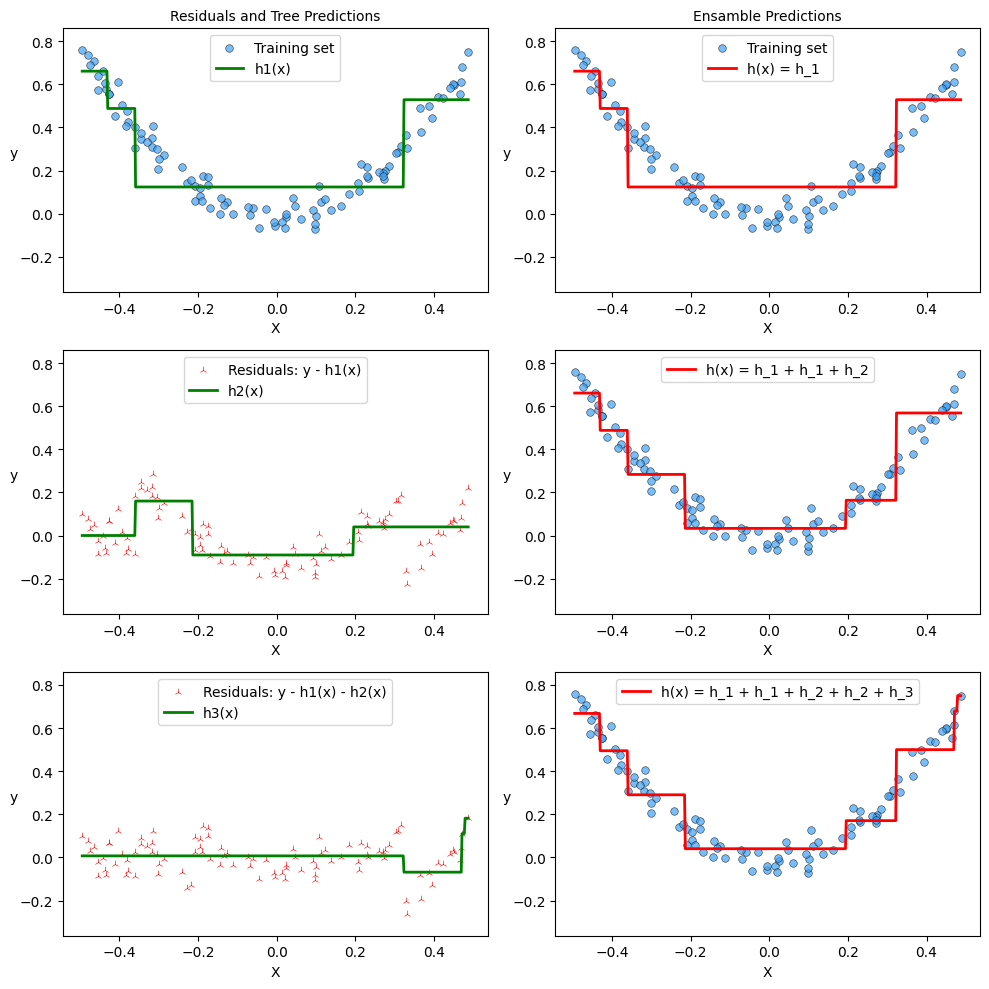

In [142]:
ymax =np.max(np.concatenate(y_train))
ymin = np.min(np.concatenate(y_train))

fig, axes = plt.subplots(nrows=n_estimators, ncols=2, figsize=(10,10))
axes = axes.flatten()

for i in range(len(axes)):
    if i==0:
        sns.scatterplot(x=X[:, 0], y=y, marker='o', color='#3FA2F6', s=30, edgecolor='k', alpha=0.7, ax=axes[i], label=generate_data_label(i))
        plot_predictions([trees[i//2]], X, y, style='g-', ax=axes[i], label=f'h{i//2+1}(x)')
    elif i%2==0:
        sns.scatterplot(x=X[:, 0], y=y_train[i//2], marker='2', color='red', s=30, alpha=1.0, ax=axes[i], label=generate_data_label(i))
        plot_predictions([trees[i//2]], X, y, style='g-', ax=axes[i], label=f'h{i//2+1}(x)')
    else:
        sns.scatterplot(x=X[:, 0], y=y, marker='o', color='#3FA2F6', s=30, edgecolor='k', alpha=0.7, ax=axes[i], label=generate_data_label(i))
        plot_predictions(trees[:i//2+1], X, y, style='r-', ax=axes[i], label=generate_label(i))

    axes[i].set_ylim(ymin-0.1, ymax+0.1)


axes[0].set_title('Residuals and Tree Predictions', fontsize=10)
axes[1].set_title('Ensamble Predictions', fontsize=10)
plt.tight_layout()
plt.show()